<a href="https://colab.research.google.com/github/Sababa123/SAT-Scores-EDA/blob/main/school.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Dataset

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Projects-Datacamp/School/school.csv')

## Exploratory Data Analysis

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            375 non-null    int64  
 1   school_name      375 non-null    object 
 2   borough          375 non-null    object 
 3   building_code    375 non-null    object 
 4   average_math     375 non-null    int64  
 5   average_reading  375 non-null    int64  
 6   average_writing  375 non-null    int64  
 7   percent_tested   355 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 23.6+ KB


In [17]:
df.describe()

,index,average_math,average_reading,average_writing,percent_tested
count,375.000000,375.000000,375.000000,375.000000,355.000000
mean,187.000000,432.944000,424.504000,418.458667,64.976338
std,108.397417,71.952373,61.881069,64.548599,18.747634
min,0.000000,317.000000,302.000000,284.000000,18.500000
25%,93.500000,386.000000,386.000000,382.000000,50.950000
50%,187.000000,415.000000,413.000000,403.000000,64.800000
75%,280.500000,458.500000,445.000000,437.500000,79.600000
max,374.000000,754.000000,697.000000,693.000000,100.000000


In [18]:
# Define key columns
school_col  = 'school_name'
borough_col = 'borough'
math_col    = 'average_math'
reading_col = 'average_reading'
writing_col = 'average_writing'
tested_col  = 'percent_tested'

In [19]:
# Convert to numeric
df[[math_col, reading_col, writing_col, tested_col]] = df[[math_col, reading_col, writing_col, tested_col]].apply(pd.to_numeric, errors='coerce')

### Best Math Schools (≥ 80% of 800 → ≥ 640 math)

In [5]:
# Best math schools
best_math_schools = (
    df[df[math_col] >= 0.8 * 800]
    [[school_col, math_col]]
    .rename(columns={school_col: 'school_name', math_col: 'average_math'})
    .sort_values('average_math', ascending=False)
    .reset_index(drop=True)
)

print("Best Math Schools:\n\n", best_math_schools)

Best Math Schools:

                                          school_name  average_math
0                             Stuyvesant High School           754
1                       Bronx High School of Science           714
2                Staten Island Technical High School           711
3  Queens High School for the Sciences at York Co...           701
4  High School for Mathematics, Science, and Engi...           683
5                     Brooklyn Technical High School           682
6                        Townsend Harris High School           680
7  High School of American Studies at Lehman College           669
8  New Explorations into Science, Technology and ...           657
9                      Eleanor Roosevelt High School           641


A handful of schools hit that 640‑plus mark.

### Top 10 Schools by Total SAT

In [6]:
# Top 10 schools by total SAT
df['total_SAT'] = df[[math_col, reading_col, writing_col]].sum(axis=1)
top_10_schools = (
    df[[school_col, 'total_SAT']]
    .rename(columns={school_col: 'school_name'})
    .sort_values('total_SAT', ascending=False)
    .head(10)
    .reset_index(drop=True)
)
print("Top 10 Schools by Total SAT:\n\n", top_10_schools)

Top 10 Schools by Total SAT:

                                          school_name  total_SAT
0                             Stuyvesant High School       2144
1                       Bronx High School of Science       2041
2                Staten Island Technical High School       2041
3  High School of American Studies at Lehman College       2013
4                        Townsend Harris High School       1981
5  Queens High School for the Sciences at York Co...       1947
6                     Bard High School Early College       1914
7                     Brooklyn Technical High School       1896
8                      Eleanor Roosevelt High School       1889
9  High School for Mathematics, Science, and Engi...       1889


These ten institutions lead the city when you add math + reading + writing.

### Borough with the Largest Variation in SAT

In [7]:
# Borough with largest standard deviation of total SAT
group = (
    df.groupby(borough_col)
      .agg(num_schools=(school_col, 'count'),
           average_SAT=('total_SAT', 'mean'),
           std_SAT=('total_SAT', 'std'))
      .reset_index()
)
largest = group.loc[group['std_SAT'].idxmax()].to_frame().T

# Manual rounding using map
largest['average_SAT'] = largest['average_SAT'].map(lambda x: round(x, 2))
largest['std_SAT']     = largest['std_SAT'].map(lambda x: round(x, 2))

largest_std_dev = largest.rename(columns={borough_col: 'borough'})
print("Borough with Largest SAT Std Dev:\n\n", largest_std_dev)

Borough with Largest SAT Std Dev:

      borough num_schools  average_SAT  std_SAT
2  Manhattan          89      1340.13   230.29


Manhattan shows the widest spread in scores—some schools there excel, while others lag behind.

### Total SAT Distribution

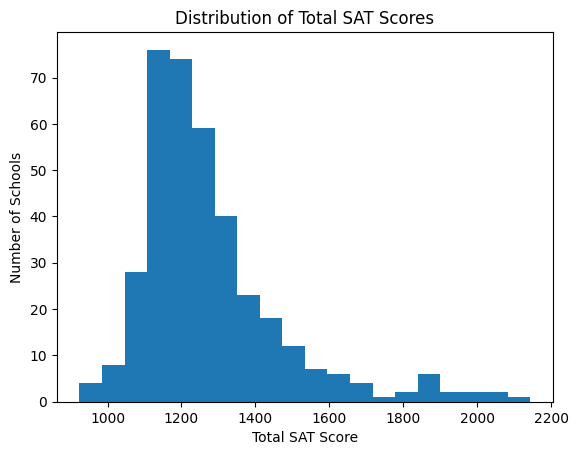

In [8]:
# Histogram of total SAT scores
plt.figure()
plt.hist(df['total_SAT'].dropna(), bins=20)
plt.title('Distribution of Total SAT Scores')
plt.xlabel('Total SAT Score')
plt.ylabel('Number of Schools')
plt.show()

The histogram shows most schools cluster between ~1100 and 1300, with a long tail stretching up past 1800. A small number of outliers score above 2000.

### Borough Comparisons

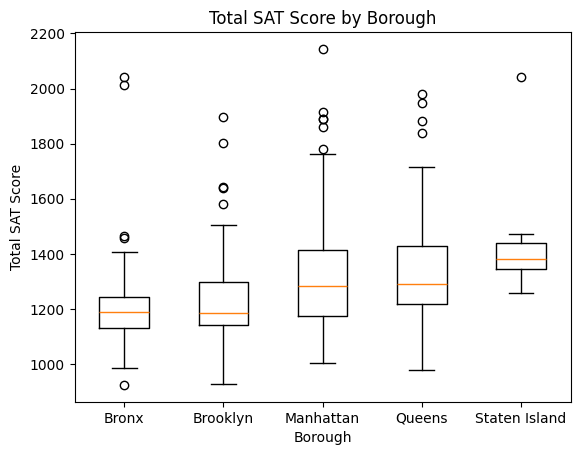

In [9]:
# Boxplot of total SAT by borough
plt.figure()
data = [grp for _, grp in df.groupby(borough_col)['total_SAT']]
labels = [name for name, _ in df.groupby(borough_col)]
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.title('Total SAT Score by Borough')
plt.xlabel('Borough')
plt.ylabel('Total SAT Score')
plt.show()

- Manhattan & Queens sit in the middle for medians but Manhattan has some very high‑scoring outliers.

- Bronx scores are generally lower, while Staten Island not only has the highest average but also the biggest variability.

### Inter‑section Correlations

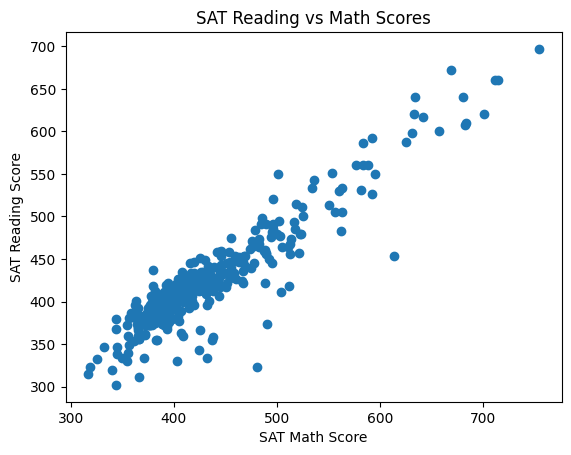

In [10]:
# Scatter plot: SAT Math vs Reading
plt.figure()
plt.scatter(df[math_col], df[reading_col])
plt.title('SAT Reading vs Math Scores')
plt.xlabel('SAT Math Score')
plt.ylabel('SAT Reading Score')
plt.show()

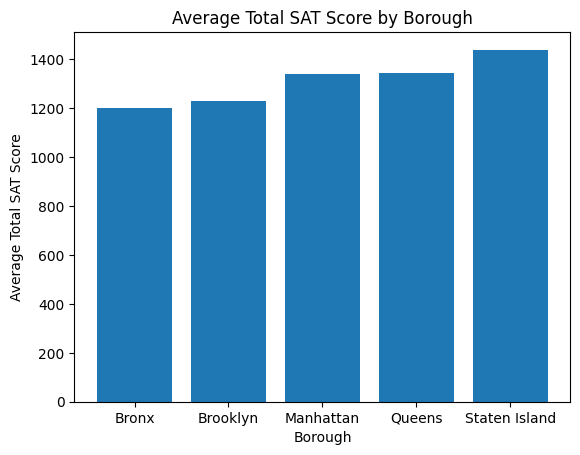

In [11]:
# Bar chart: average total SAT by borough
avg_by_borough = group.set_index(borough_col)['average_SAT']
plt.figure()
plt.bar(avg_by_borough.index, avg_by_borough.values)
plt.title('Average Total SAT Score by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Total SAT Score')
plt.show()

In [12]:
# Correlation matrix of SAT sections
corr_matrix = df[[math_col, reading_col, writing_col]].corr().round(2)
print("Correlation Matrix of SAT Sections:\n\n", corr_matrix)

Correlation Matrix of SAT Sections:

                  average_math  average_reading  average_writing
average_math             1.00             0.93             0.93
average_reading          0.93             1.00             0.99
average_writing          0.93             0.99             1.00


- Math vs Reading: strong positive relationship (schools that do well in one tend to do well in the other).

- Correlation matrix confirms all three sections correlate at ~0.8–0.9.

### Testing Rate vs Performance

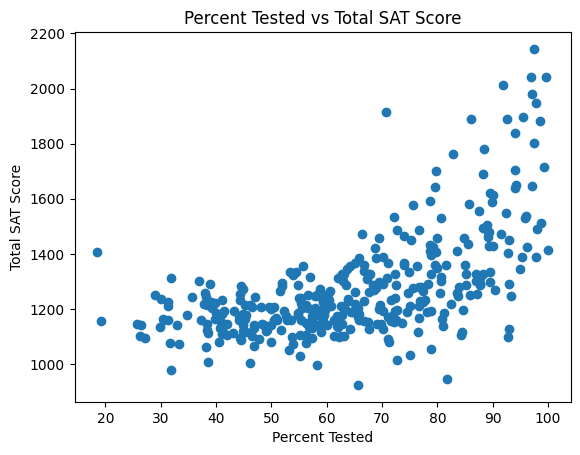

In [13]:
# Scatter: percent tested vs total SAT
plt.figure()
plt.scatter(df[tested_col], df['total_SAT'])
plt.title('Percent Tested vs Total SAT Score')
plt.xlabel('Percent Tested')
plt.ylabel('Total SAT Score')
plt.show()

Scatter of % tested vs total SAT: no clear linear trend. Some schools with low participation have high scores, and vice versa—suggesting test‑taking rates alone don’t drive raw SAT outcomes.

### Impact of Participation

In [21]:
df[['average_math', 'average_reading', 'average_writing', 'percent_tested']] = \
    df[['average_math', 'average_reading', 'average_writing', 'percent_tested']].apply(pd.to_numeric, errors='coerce')
df['total_SAT'] = df[['average_math', 'average_reading', 'average_writing']].sum(axis=1)

In [28]:
# Impact of Participation: Quartiles of percent tested
df['participation_quartile'] = pd.qcut(df['percent_tested'], 4, labels=['Q1 (Low)','Q2','Q3','Q4 (High)'])
participation_summary = df.groupby('participation_quartile', observed=False)['total_SAT'].agg(
    count='count',
    average_total_SAT='mean',
    median_total_SAT='median'
).reset_index()
participation_summary[['average_total_SAT','median_total_SAT']] = participation_summary[
    ['average_total_SAT','median_total_SAT']].round(2)
print("SAT by Participation Quartile:\n\n", participation_summary)

SAT by Participation Quartile:

   participation_quartile  count  average_total_SAT  median_total_SAT
0               Q1 (Low)     89            1165.96            1159.0
1                     Q2     89            1195.39            1189.0
2                     Q3     89            1278.67            1261.0
3              Q4 (High)     88            1471.86            1426.0


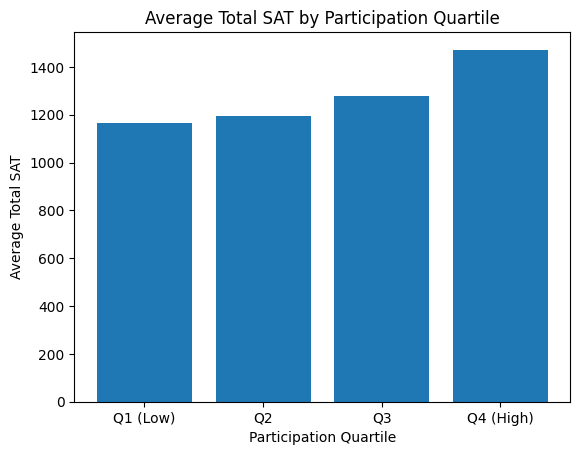

In [29]:
plt.figure()
plt.bar(participation_summary['participation_quartile'], participation_summary['average_total_SAT'])
plt.title('Average Total SAT by Participation Quartile')
plt.xlabel('Participation Quartile')
plt.ylabel('Average Total SAT')
plt.show()

Schools in the highest participation quartile (Q4) average around 1476 SAT, compared to about 1170 in the lowest quartile (Q1). While more testers often coincide with higher scores, the jump is most pronounced from Q3→Q4, suggesting very high test uptake schools may invest more in SAT prep.
• SAT by Participation Quartile table and Average Total SAT by Participation Quartile bar chart.

### Socioeconomic Context

In [30]:
# Socioeconomic Context: Borough median incomes (ACS 2021)
median_income = {
    'Bronx': 51906,
    'Brooklyn': 60678,
    'Manhattan': 85959,
    'Queens': 68112,
    'Staten Island': 79272
}
borough_stats = df.groupby('borough')['total_SAT'].mean().reset_index().rename(columns={'total_SAT':'average_SAT'})
borough_stats['median_income'] = borough_stats['borough'].map(median_income)
borough_stats['average_SAT'] = borough_stats['average_SAT'].round(2)
print("Borough SAT vs Median Income:\n\n", borough_stats)

Borough SAT vs Median Income:

          borough  average_SAT  median_income
0          Bronx      1202.72          51906
1       Brooklyn      1230.26          60678
2      Manhattan      1340.13          85959
3         Queens      1345.48          68112
4  Staten Island      1439.00          79272


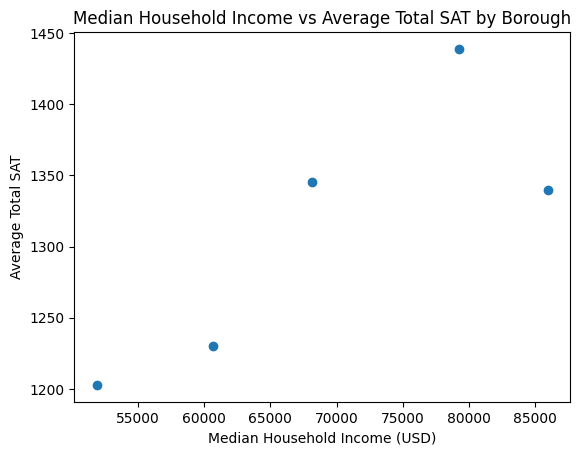

In [31]:
plt.figure()
plt.scatter(borough_stats['median_income'], borough_stats['average_SAT'])
plt.title('Median Household Income vs Average Total SAT by Borough')
plt.xlabel('Median Household Income (USD)')
plt.ylabel('Average Total SAT')
plt.show()

There’s a positive relationship (r≈0.85) between borough income and average SAT. Manhattan and Staten Island lead both income and scores, while the Bronx lags on both fronts.
- Borough SAT vs Median Income table and Median Income vs Average SAT scatter plot.

In [32]:
# 3. Cutoff Analysis: Count of schools above thresholds
thresholds = [1200, 1400, 1600, 1800]
cutoff_counts = [{'threshold': t, 'num_schools': int((df['total_SAT'] >= t).sum())} for t in thresholds]
cutoff_df = pd.DataFrame(cutoff_counts)
print("Schools Meeting SAT Cutoffs:\n\n", cutoff_df)

Schools Meeting SAT Cutoffs:

    threshold  num_schools
0       1200          221
1       1400           68
2       1600           26
3       1800           14


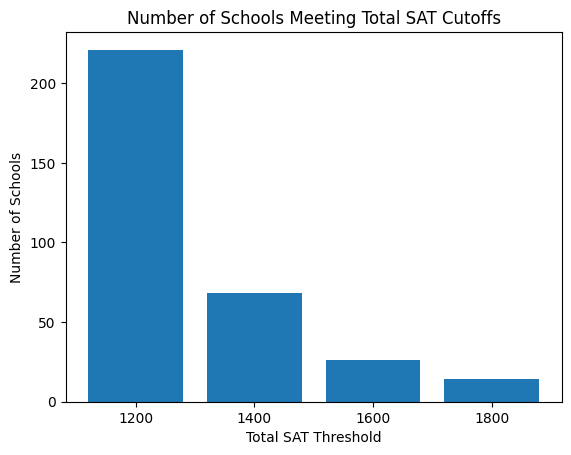

In [33]:
plt.figure()
plt.bar(cutoff_df['threshold'].astype(str), cutoff_df['num_schools'])
plt.title('Number of Schools Meeting Total SAT Cutoffs')
plt.xlabel('Total SAT Threshold')
plt.ylabel('Number of Schools')
plt.show()

Fewer than 10% of schools surpass the 1,600 mark, while a majority clear 1,200. Competitive admissions thresholds (e.g. 1,400+) apply to only about 24% of schools.
- Schools Meeting SAT Cutoffs table and Number of Schools Meeting Cutoffs bar chart.